<a href="https://colab.research.google.com/github/Mrym17/MachineLearning-with-python/blob/main/Decision_Tree_Classification_Players_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

# **Loading Dataset**

In [ ]:
df = pd.read_csv('/content/Selection dataset.csv')

In [ ]:
df

,Player,Local_Season_Average,Foreign_Season_Performance,Fitness_Test,Decision
0,P1,40+,Good,Acceptable fitness,Selected
1,P2,40+,Poor,Acceptable fitness,Not selected
2,P3,60+,Good,Acceptable fitness,Selected
3,P4,60+,Poor,Acceptable fitness,Selected
4,P5,40+,Good,Needs more fitness,Not selected
5,P6,40+,Poor,Needs more fitness,Not selected
6,P7,60+,Good,Needs more fitness,Not selected
7,P8,60+,Poor,Needs more fitness,Not selected


# **Data Visualization**

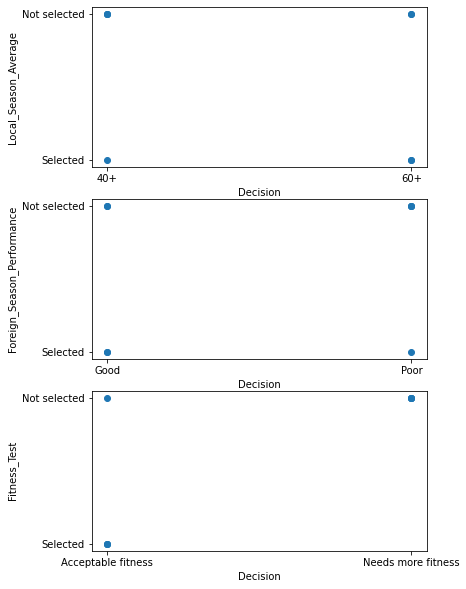

In [ ]:
# Pair-wise Scatter Plots

fig, ax = plt.subplots(3, figsize=(6, 10))
ax[0].scatter(x = df['Local_Season_Average'], y = df['Decision'])
ax[0].set_xlabel("Decision")
ax[0].set_ylabel("Local_Season_Average")

ax[1].scatter(x = df['Foreign_Season_Performance'], y = df['Decision'])
ax[1].set_xlabel("Decision")
ax[1].set_ylabel("Foreign_Season_Performance")
ax[2].scatter(x = df['Fitness_Test'], y = df['Decision'])
ax[2].set_xlabel("Decision")
ax[2].set_ylabel("Fitness_Test")


plt.show()

# **Data Preprocessing**

In [ ]:
#Dropping cloumn Player  as its not a X feature 
df.drop(['Player'],inplace=True, axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
Local_Season_Average = label.fit_transform(df.Local_Season_Average)

In [ ]:
Foreign_Season_Performance	 = label.fit_transform(df.Foreign_Season_Performance)
Fitness_Test = label.fit_transform(df.Fitness_Test)
#Decision = label.fit_transform(df.Decision)

In [ ]:
df['LSP'] = Local_Season_Average
df['FSP'] = Foreign_Season_Performance	
df['Fitness'] = Fitness_Test
#df['decision'] = Decision


In [ ]:
df

,Local_Season_Average,Foreign_Season_Performance,Fitness_Test,Decision,LSP,FSP,Fitness
0,40+,Good,Acceptable fitness,Selected,0,0,0
1,40+,Poor,Acceptable fitness,Not selected,0,1,0
2,60+,Good,Acceptable fitness,Selected,1,0,0
3,60+,Poor,Acceptable fitness,Selected,1,1,0
4,40+,Good,Needs more fitness,Not selected,0,0,1
5,40+,Poor,Needs more fitness,Not selected,0,1,1
6,60+,Good,Needs more fitness,Not selected,1,0,1
7,60+,Poor,Needs more fitness,Not selected,1,1,1


In [ ]:
df.drop(['Local_Season_Average', 'Foreign_Season_Performance', 'Fitness_Test'], axis=1, inplace=True)

In [ ]:
df

,Decision,LSP,FSP,Fitness
0,Selected,0,0,0
1,Not selected,0,1,0
2,Selected,1,0,0
3,Selected,1,1,0
4,Not selected,0,0,1
5,Not selected,0,1,1
6,Not selected,1,0,1
7,Not selected,1,1,1


# **Data Split**

In [ ]:
ratio = 0.8
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Spliting data into test and train
train = df[0:train_size]
test = df[train_size:]

In [ ]:
X = train.drop('Decision', axis = 1)
y = train['Decision']

x_test = test.drop('Decision', axis = 1)
y_test = test['Decision']

In [ ]:
X.shape, y.shape

((6, 3), (6,))

# **Applying Decision Tree Classifier**

# For Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6666666666666666, 0.875, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

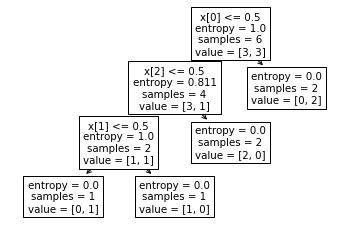

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model)

In [ ]:
model.apply(X)

array([3, 4, 6, 6, 5, 5])

In [ ]:
model.decision_path(X)

<6x7 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
Y_pred = model.predict(x_test) 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pred)

0.0

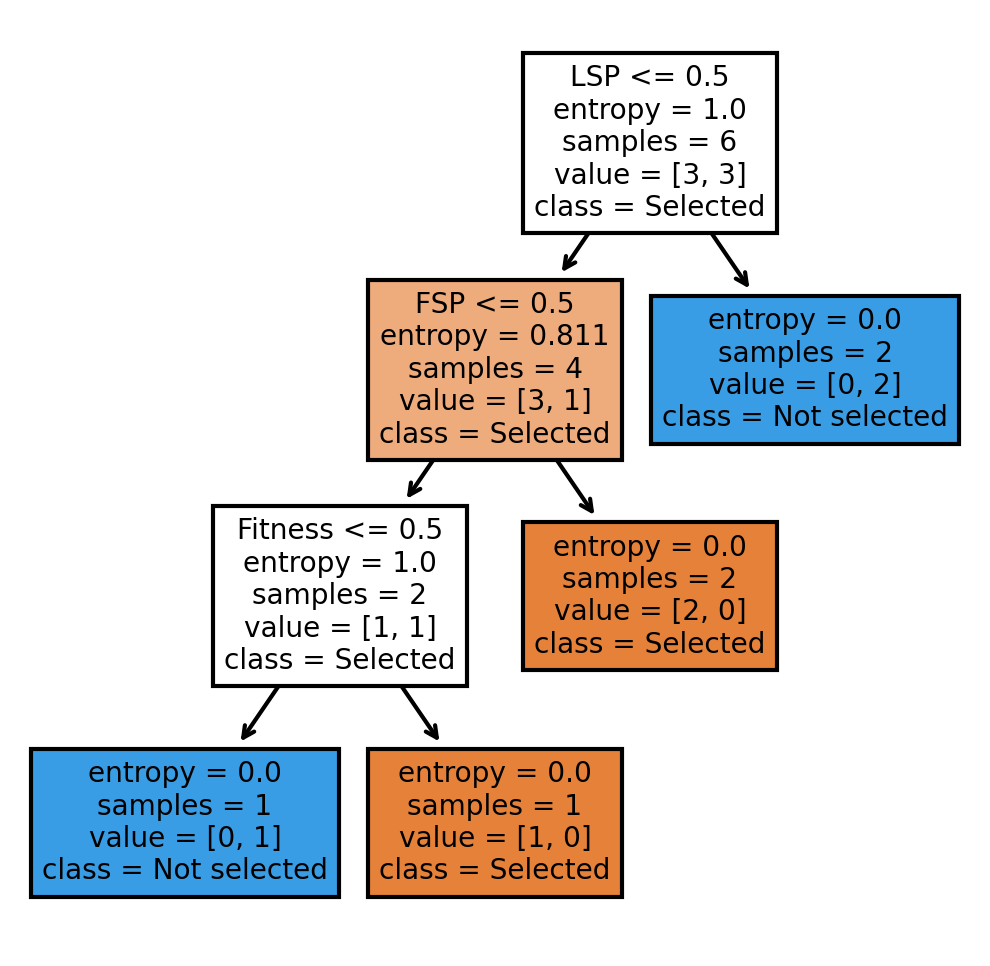

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(model,
               feature_names = X.columns, 
               class_names=y.values,
               filled = True);
fig.savefig('imagename.png')

# **Gini Impurity**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

In [ ]:
model.fit(X, y)

DecisionTreeClassifier()

[Text(0.6666666666666666, 0.875, 'x[0] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

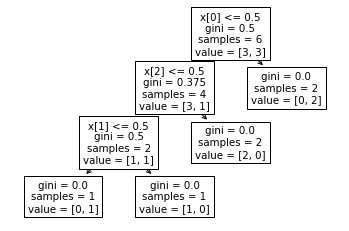

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model)

In [ ]:
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Decision Tree accuracy: ", accuracy_score(y_test, pred))

Decision Tree accuracy:  0.0


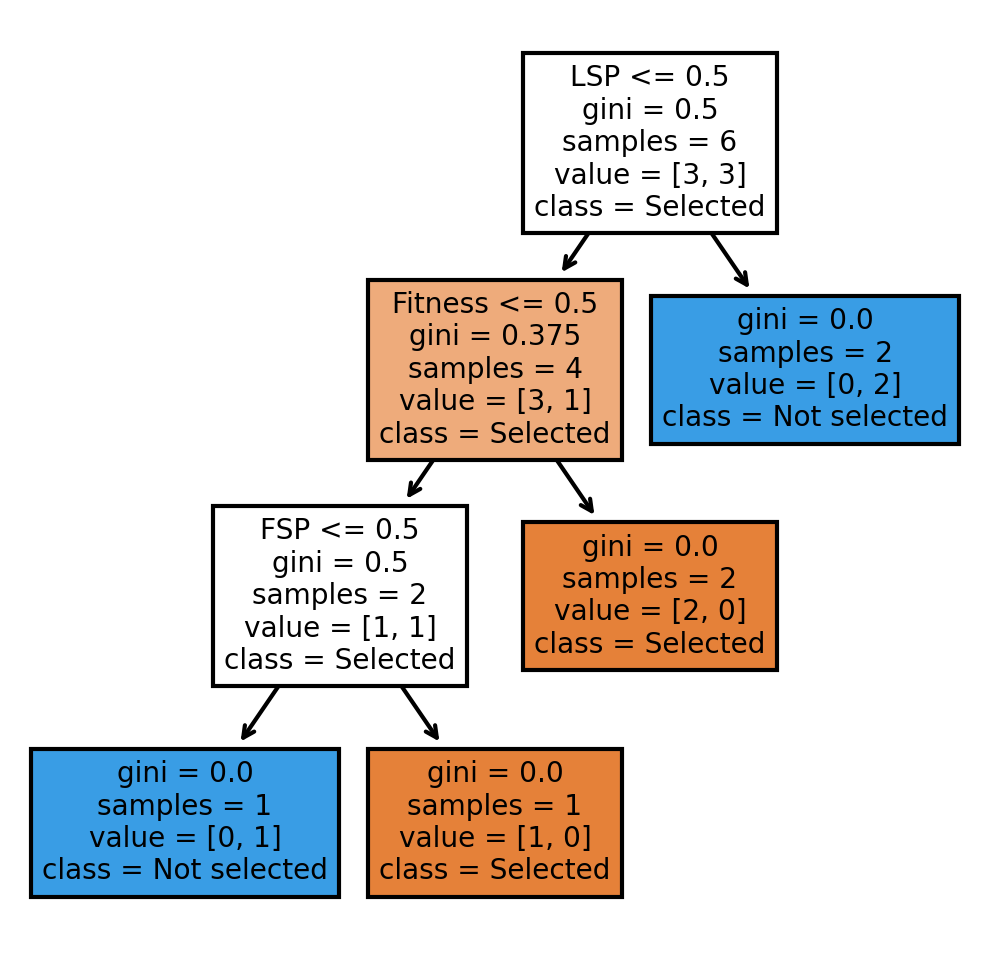

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(model, feature_names = X.columns, class_names=y.values, filled = True);
fig.savefig('imagename.png')